# Isotopes at Grosser Naturschacht

The aim of this notebook is to plot some recent data from the isotope transect of the Grosser Naturschacht.

Grosser Naturschacht (GN) is located in the vicinity of Dobratsch weather station (Villacher Alpe).
The ice cave begins as an open pit with a firn/ice body, beyond which, a corridor between bedrock and ice leads to the main chamber of the cave.



Most samples are taken from the firn-derived ice, but we compare the samples from congelation ice (modern and possibly more ancient) with those that are clearly firn-derived.

Samples GNS-01 to GNS-18 are sampled from 15.35 m height onwards.

Samples GNS-33 and GNS-45/46 are taken from clear congelation ice layers, including one seasonal ice formation

<div>
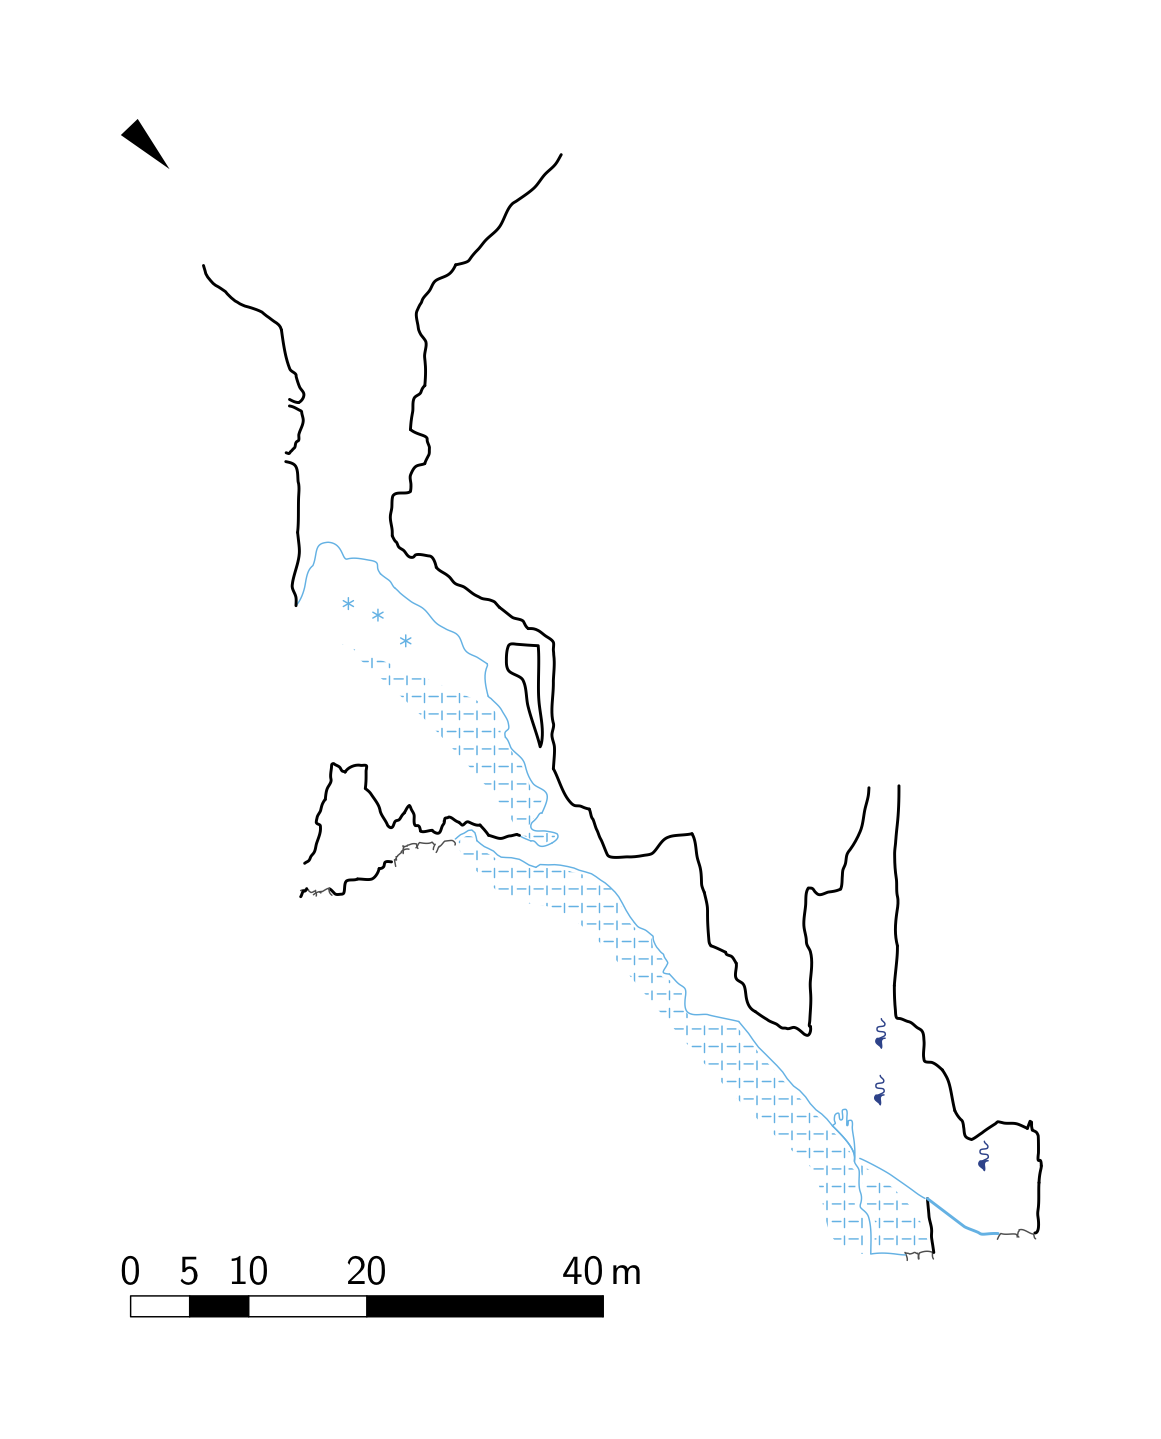
</div>


The samples are taken from the base of the shaft onwards.

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-in-caves


In [2]:
import lib.GNIP as gnip         #this module contains the plotter methods for the GNIP and ANIP datasets
import lib.isotopes as iso      #this custom module contains reader and plotter methods for the cave isotope transects
import numpy as np
from scipy import stats
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
gns = iso.read_excel("../dat/samples_iso_grosser_naturschacht_15_10_2019.xlsx")
austria = gnip.csv_read("../dat/wiser_bulkdata_at.csv")

In [4]:
gns.head()

column height (cm)  s.d. height       d18O  s.d. d18O  \
transect protocol                                                          
-999     SHALLOW                 2550            5 -11.292546   0.077982   
         SHALLOW                 2550            5 -11.246603   0.029224   
-998     SHALLOW                    0            5  -9.727324   0.017677   
 1       SHALLOW                   17            5  -9.070124   0.053630   
         SHALLOW                   34            5  -9.275541   0.083347   

                         d2H  s.d. d2H  layer  layer type  
transect protocol                                          
-999     SHALLOW  -78.018286  0.771559      0           1  
         SHALLOW  -79.442228  0.331415      0           1  
-998     SHALLOW  -65.157532  0.292735     11           1  
 1       SHALLOW  -62.227616  0.302685      1           1  
         SHALLOW  -63.828437  0.783548      2           1

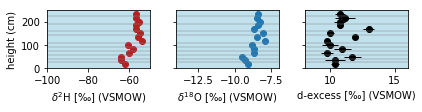

In [5]:
iso.transectPlotter(gns,{"lower transect":1},
                    filename="../fig/isotopes/gns_lower_transect.pdf",
                    figsize = (6,15*300/2700),
                   legend= False)

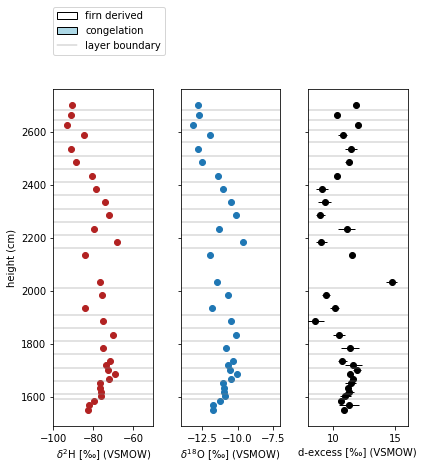

In [6]:
iso.transectPlotter(gns,{"upper transect":2},
                    filename="../fig/isotopes/gns_upper_transect.pdf",
                    figsize = (6,15*1200/2700),
                   legend= True)

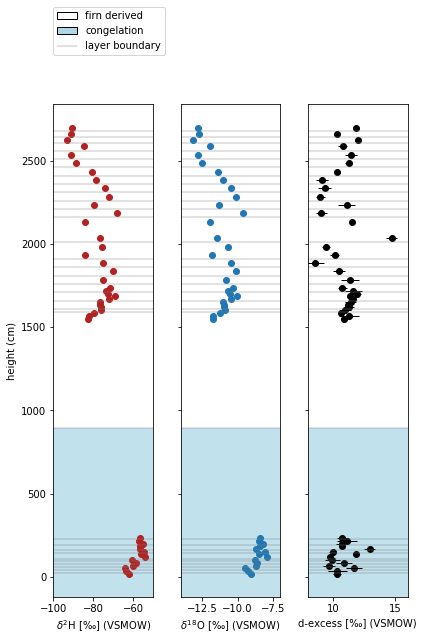

In [7]:
iso.transectPlotter(gns,{"both transects":[1,2]},
                    filename="../fig/isotopes/gns_both_transects.pdf")

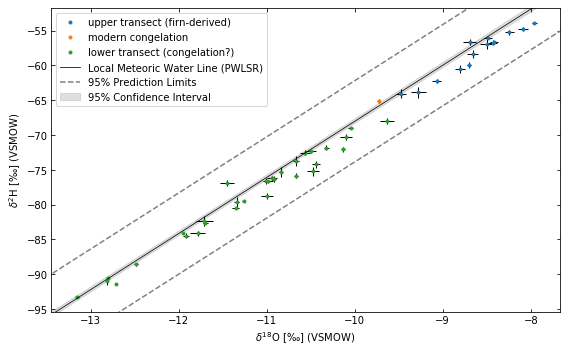

In [8]:
iso.full_plotter(gns,
                 {"upper transect (firn-derived)":1,"modern congelation":-998,"lower transect (congelation?)":2},
                 austria,
                 "VILLACHER ALPE",
                 filename="../fig/isotopes/gns_villacher_alpe_isotopes_ice.pdf",loc='best')

(-9.0, -96.0)
(-9.0, -96.0)


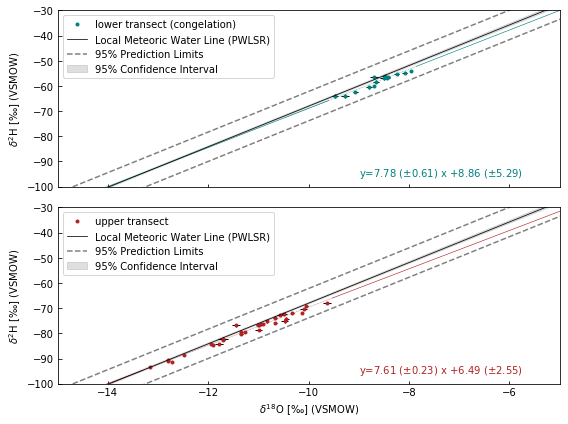

In [9]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize= (8,6))

iso.IsoLSRPlotter(gns,
                 {"lower transect (congelation)":1},
                 austria,
                 "VILLACHER ALPE",ax=ax1,color='teal')
ax1.legend()
ax1.set_xlabel("")
iso.IsoLSRPlotter(gns,
                 {"upper transect":2},
                 austria,
                 "VILLACHER ALPE",ax=ax2,color='firebrick')
ax2.legend()
plt.tight_layout()
plt.savefig("../fig/isotopes/gns_both_transects_figure.pdf",dpi=300)
plt.show()

(-7, -50)


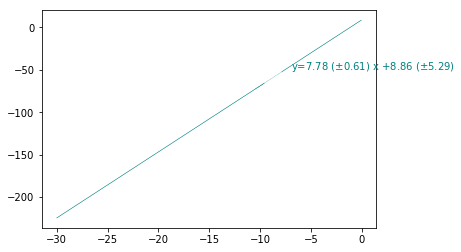

In [10]:
fig,ax = plt.subplots()

len(gns.loc[1])
iso.myODR(ax,gns,1,'teal',(-7,-50))
plt.show()

In [11]:
iso.get_stats(gns,{'cave ice':1})

,$\delta^{18}$O cave ice,$\delta^{2}$H cave ice,d-excess cave ice
maxi,-7.958202,-53.894894,12.977718
mean,-8.629256,-58.251008,10.783039
median,-8.580974,-56.811731,10.719256
mini,-9.470330,-64.051263,9.710644
std.,0.427260,3.322876,0.915037


In [12]:
iso.get_stats(gns,{'cave ice':2})

,$\delta^{18}$O cave ice,$\delta^{2}$H cave ice,d-excess cave ice
maxi,-9.635876,-68.024327,14.734035
mean,-11.213451,-78.824053,10.883558
median,-10.993546,-76.649680,11.114409
mini,-13.155807,-93.243735,8.582395
std.,0.909391,6.918569,1.189315


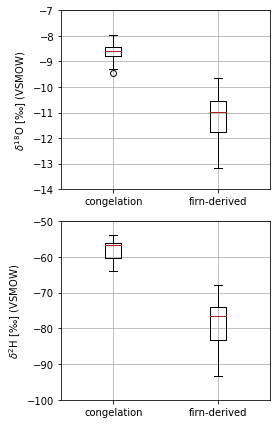

In [18]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize= (4,6))

bp1 = gns.loc[[2,1]].boxplot(by='transect',column= ["d18O"],ax = ax1,return_type='dict')
bp2 = gns.loc[[2,1]].boxplot(by='transect',column= ["d2H"],ax = ax2,return_type='dict')

ax1.set_ylabel("$\delta^{18}$O [‰] (VSMOW)")
for AX in (ax1,ax2):
    AX.set_title("")
    AX.set_xticklabels(labels=["congelation","firn-derived"])
    AX.set_xlabel("")
ax1.set_ylim(-14,-7)
ax2.set_ylabel("$\delta^{2}$H [‰] (VSMOW)")
ax2.set_ylim(-100,-50)

for bp in (bp1,bp2):
    [[item.set_color('firebrick') for item in bp[key]['medians']] for key in bp.keys()]
    [[item.set_color('black') for item in bp[key]['boxes']] for key in bp.keys()]
    [[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]

plt.suptitle("")
plt.title("")
plt.tight_layout()
plt.savefig("../fig/isotopes/transect_boxplot_comparison_gns.pdf", dpi = 300)
plt.show()

In [14]:
iso.get_stats(gns,{"congelation ice":1})

,$\delta^{18}$O congelation ice,$\delta^{2}$H congelation ice,d-excess congelation ice
maxi,-7.958202,-53.894894,12.977718
mean,-8.629256,-58.251008,10.783039
median,-8.580974,-56.811731,10.719256
mini,-9.470330,-64.051263,9.710644
std.,0.427260,3.322876,0.915037


In [15]:
xi=gns.loc[1]["d18O"]
yi=gns.loc[1]["d2H"]

iso.myODR(xi,yi).pprint()

TypeError: myODR() missing 3 required positional arguments: 'transect', 'colour', and 'posxy'

In [ ]:
xi=gns.loc[2]["d18O"]
yi=gns.loc[2]["d2H"]

iso.myODR(xi,yi).beta